<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/FINAL_Light_Sesa_RJ_BAIRROS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Seção**


Intalação Pacotes e Programas necessários


In [ ]:
!pip install geopandas
import geopandas
geopandas.__version__

     |████████████████████████████████| 1.0MB 8.5MB/s 
     |████████████████████████████████| 6.6MB 42.5MB/s 
     |████████████████████████████████| 15.4MB 280kB/s 


'0.9.0'

In [ ]:
!pip install rtree 

!pip install pygeos 

!pip install folium

from shapely.geometry import Polygon, Point, LineString, MultiPolygon, LinearRing
import pandas as pd
import os
import zipfile
import shutil

     |████████████████████████████████| 1.0MB 8.8MB/s 
     |████████████████████████████████| 2.0MB 7.9MB/s 


In [ ]:
!pip install fiona
!pip install pyproj
!pip install psycopg2 
!pip install GeoAlchemy2
!pip install geopy
%matplotlib inline
import geopandas as gpd

No Prompt:

Para escolher um local que considere os arquivos da pas

cd Y:pasta

jupyter notebook

Nesse caso, pois temos que usar arquivos, é melhor usar o jupyter

In [ ]:
%matplotlib inline
import geopandas as gpd

2. Seção


Upload dos dados básicos (PASTA DADOS BÁSICOS)

Fonte de Dados

In [ ]:
rj = gpd.read_file('33MUE250GC_SIR.shp')
rj

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221..."
1,1469,3300159,APERIBÉ,"POLYGON ((-42.08950 -21.62893, -42.08912 -21.6..."
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5..."
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296..."
...,...,...,...,...
87,1555,3306008,TRÊS RIOS,"POLYGON ((-43.13666 -22.10933, -43.13182 -22.1..."
88,1556,3306107,VALENÇA,"POLYGON ((-43.82120 -22.08844, -43.82101 -22.0..."
89,1557,3306156,VARRE-SAI,"POLYGON ((-41.82695 -20.84164, -41.82686 -20.8..."
90,1558,3306206,VASSOURAS,"POLYGON ((-43.61208 -22.30841, -43.61113 -22.3..."


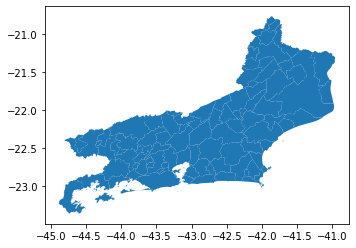

In [ ]:
rj.plot()

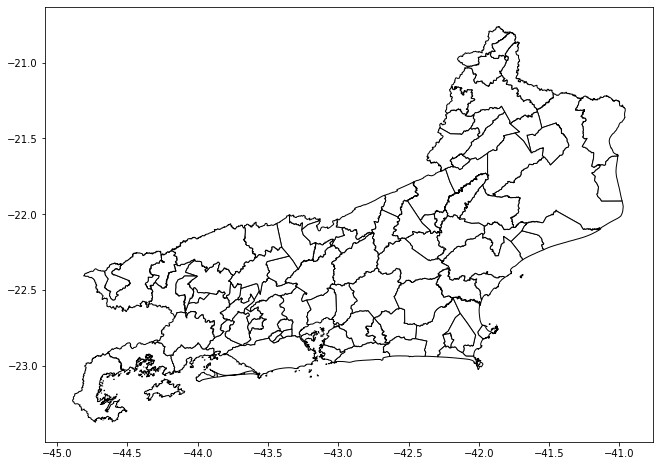

In [ ]:
rj.plot(color = 'white', edgecolor = 'black', figsize = (15,8))

Criando Shapefiles

In [ ]:
rjs = rj[rj['NM_MUNICIP'] == 'RIO DE JANEIRO']

In [ ]:
rjs

,ID,CD_GEOCODM,NM_MUNICIP,geometry
67,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((-43.12376 -22.80712, -43.12380..."


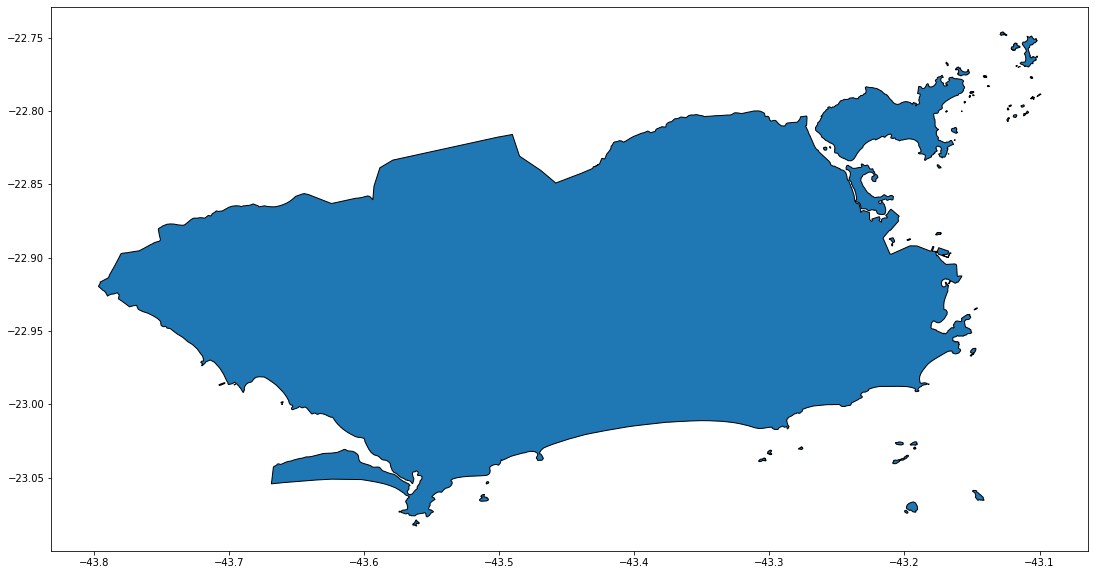

In [ ]:
rjs.plot(edgecolor = 'black',figsize = (20,10))

In [ ]:
import os

dir = '..'
if not os.path.exists(dir):
  os.makedirs(dir)

In [ ]:
#rjs.to_file(dir + 'RJ-MUNIC.shp')
rjs.to_file('RJ-MUNIC.shp')

In [ ]:
rjs = rjs.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs')

3. Transformando Data Frame em GeoDataFrame

4. Selecionando Pontos numa região

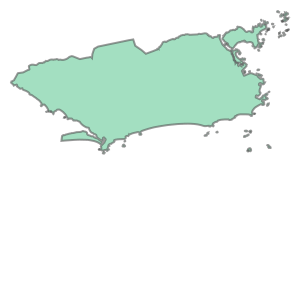

In [ ]:
rjs.iloc[0].geometry

In [ ]:
#NO COLAB É NECESSÁRIO JOGAS NESTA PASTA OS ARQUIVOS 3333....

#O CERTO É UPLODAR OS ARQUIVOS ZIP NA PASTA TEMP. DEPOIS EXTRAIR.

dir = 'DADOS/RJ-SETOR/TEMP'
if not os.path.exists(dir):
  os.makedirs(dir)

In [ ]:
filenames = []

for root, dirs, files in os.walk('DADOS/RJ-SETOR'):
  print(dirs)
  filenames = files

print(filenames)

['TEMP']
[]
['33045570539.zip', '33045570522.zip', '33045570538.zip', '33045570520.zip', '33045570525.zip', '33045570534.zip', '33045570535.zip', '33045570531.zip', '33045570507.zip', '33045570516.zip', '33045570514.zip', '33045570510.zip', '33045570527.zip', '33045570519.zip', '33045570515.zip', '33045570512.zip', '33045570533.zip', '33045570536.zip', '33045570508.zip', '33045570509.zip', '33045570529.zip', '33045570511.zip', '33045570523.zip', '33045570528.zip', '33045570530.zip', '33045570513.zip', '33045570537.zip', '33045570521.zip', '33045570524.zip', '33045570517.zip', '33045570526.zip', '33045570532.zip']


In [ ]:
for item in filenames:
  zip_ref = zipfile.ZipFile('DADOS/RJ-SETOR/TEMP/' + item, 'r')
  zip_ref.extractall(dir)
  zip_ref.close()

In [ ]:
filenames[0][0:-4]

'33045570539'

In [ ]:
#LIST COMPREHENSION


[gpd.read_file(dir + '/' + item[:-4] + '_setor.shp') for item in filenames]

[        ID1  ...                                           geometry
 0    410304  ...  MULTIPOLYGON (((-43.29882 -22.81212, -43.29882...
 1    410310  ...  POLYGON ((-43.31895 -22.80329, -43.31895 -22.8...
 2    410285  ...  POLYGON ((-43.29222 -22.82022, -43.29262 -22.8...
 3    410286  ...  POLYGON ((-43.29089 -22.81800, -43.29079 -22.8...
 4    410305  ...  POLYGON ((-43.29874 -22.81132, -43.29874 -22.8...
 ..      ...  ...                                                ...
 223  411867  ...  POLYGON ((-43.29333 -22.81829, -43.29377 -22.8...
 224  411868  ...  POLYGON ((-43.29329 -22.81929, -43.29319 -22.8...
 225  411869  ...  POLYGON ((-43.30973 -22.80906, -43.31263 -22.8...
 226  411870  ...  POLYGON ((-43.31544 -22.81293, -43.31570 -22.8...
 227  411871  ...  POLYGON ((-43.32788 -22.80501, -43.32801 -22.8...
 
 [228 rows x 14 columns],
         ID1  ...                                           geometry
 0    406775  ...  POLYGON ((-43.44270 -22.87227, -43.44270 -22.8...
 1    

In [ ]:
setor = pd.concat([gpd.read_file(dir + '/' + item[:-4] + '_setor.shp') for item in filenames], ignore_index= True)

In [ ]:
#DROPAR O TEMP

shutil.rmtree(dir)

No setor, temos de legal a geometria, o NM_BAIRRO E NM_DISTRITO

In [ ]:
setor


,ID1,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODD,NM_DISTRIT,CD_GEOCODS,NM_SUBDIST,CD_GEOCODM,NM_MUNICIP,NM_MESO,NM_MICRO,geometry
0,410304,330455705390200,URBANO,330455705044,Parada de Lucas,330455705,RIO DE JANEIRO,330455705,VIGÁRIO GERAL,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"MULTIPOLYGON (((-43.29882 -22.81212, -43.29882..."
1,410310,330455705390206,URBANO,330455705045,Vigário Geral,330455705,RIO DE JANEIRO,330455705,VIGÁRIO GERAL,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.31895 -22.80329, -43.31895 -22.8..."
2,410285,330455705390043,URBANO,330455705043,Cordovil,330455705,RIO DE JANEIRO,330455705,VIGÁRIO GERAL,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.29222 -22.82022, -43.29262 -22.8..."
3,410286,330455705390044,URBANO,330455705043,Cordovil,330455705,RIO DE JANEIRO,330455705,VIGÁRIO GERAL,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.29089 -22.81800, -43.29079 -22.8..."
4,410305,330455705390201,URBANO,330455705044,Parada de Lucas,330455705,RIO DE JANEIRO,330455705,VIGÁRIO GERAL,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.29874 -22.81132, -43.29874 -22.8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10424,410794,330455705320123,URBANO,330455705150,Engenho da Rainha,330455705,RIO DE JANEIRO,330455705,INHAÚMA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.29763 -22.87068, -43.29728 -22.8..."
10425,410795,330455705320124,URBANO,330455705150,Engenho da Rainha,330455705,RIO DE JANEIRO,330455705,INHAÚMA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.29701 -22.86886, -43.29696 -22.8..."
10426,410796,330455705320133,URBANO,330455705151,Tomás Coelho,330455705,RIO DE JANEIRO,330455705,INHAÚMA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.30793 -22.86696, -43.30769 -22.8..."
10427,410797,330455705320134,URBANO,330455705151,Tomás Coelho,330455705,RIO DE JANEIRO,330455705,INHAÚMA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.30909 -22.86277, -43.30905 -22.8..."


In [ ]:
type(setor)

geopandas.geodataframe.GeoDataFrame

In [ ]:
setor.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
setor = setor.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs')
setor.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

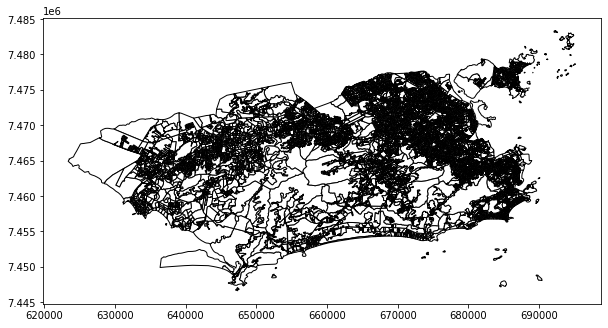

In [ ]:
setor.plot(color='white', edgecolor = 'black', figsize = (10,20))

In [ ]:
#SALVAR

setor.to_file('DADOS/RJ-SETOR/RJ-SETOR-BAIRROS.shp')

In [ ]:
bairro = 'Gávea'

bairroTeste = setor[setor['NM_BAIRRO'] == 'Gávea']

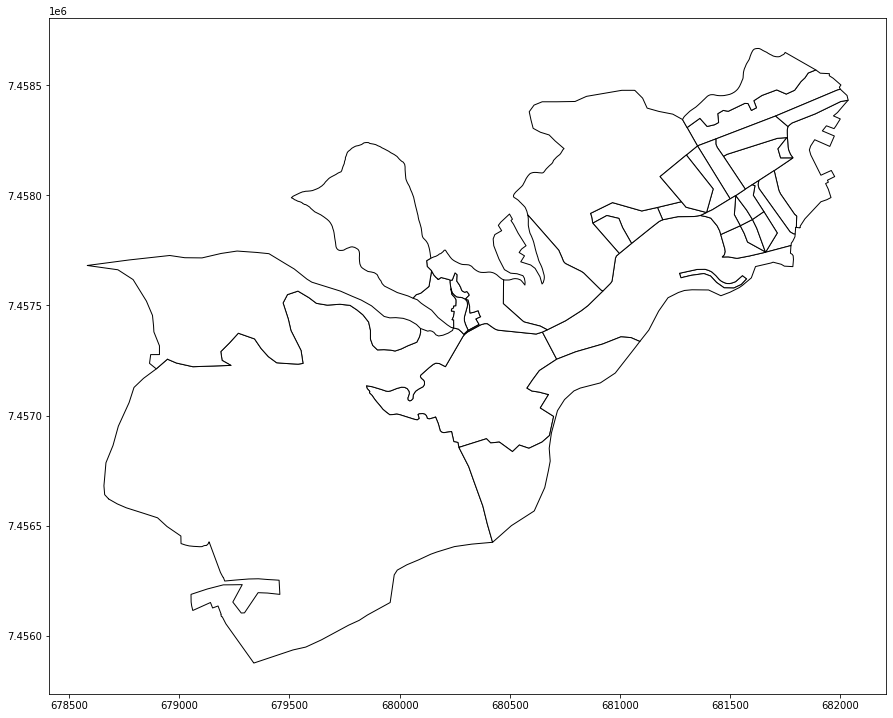

In [ ]:
bairroTeste.plot(color='white', edgecolor = 'black', figsize = (15,20))

# Vamos atribuir valores aos bairros

# **AGREGAR REGIÃO SEGUNDO DETERMINADA VARIÁVEL**

Tratamento DADOS LUZ

In [ ]:
type(bairro)

str

In [ ]:
ConsumoLuz = pd.read_excel('tabela 2501-bairros rj-todosSALVO.xlsx')

In [ ]:
ConsumoLuz.head(100)

,NM_BAIRRO,Total,Residencial,Industrial (1),Comercial (1),Rural,Poder público,Iluminacão pública,Serv.público (1),Consumo próprio,Latitute,Longitude
0,Abolição,19441.556000,12230.488,556.128,6096.616000,0.00,151.711,0.000,406.613,0.000,-22.8856,-43.2994
1,Acari,7353.163475,1190.886,67.962,433.936475,0.00,5378.546,0.000,281.833,0.000,-22.8213,-43.3416
2,Água Santa,10330.072000,5456.169,199.630,3793.743000,1.10,588.159,288.778,0.000,2.493,-22.9106,-43.3128
3,Alto da Boa Vista,23349.970000,9804.439,139.929,11318.664000,51.91,1182.443,1.100,825.834,25.651,-22.9571,-43.2562
4,Anchieta,52321.489000,35744.391,1330.671,12455.967000,0.00,1506.095,0.000,1187.076,97.289,-22.8243,-43.3987
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Moneró,11272.225000,8143.711,147.066,2790.960000,0.00,186.799,0.000,3.689,0.000,-22.7968,-43.1970
96,Olaria,81361.623276,48286.201,2958.214,22172.053276,0.00,7093.032,0.000,678.314,173.809,-22.8466,-43.2733
97,Oswaldo Cruz,45856.117000,31453.178,783.903,12516.619000,0.00,590.817,0.000,511.600,0.000,-22.8708,-43.3499
98,Paciência,70118.253692,50110.896,1322.112,14216.245692,0.88,4209.234,0.000,196.414,62.472,-22.8978,-43.6396


In [ ]:
setor.dtypes

ID1              int64
CD_GEOCODI      object
TIPO            object
CD_GEOCODB      object
NM_BAIRRO       object
CD_GEOCODD      object
NM_DISTRIT      object
CD_GEOCODS      object
NM_SUBDIST      object
CD_GEOCODM      object
NM_MUNICIP      object
NM_MESO         object
NM_MICRO        object
geometry      geometry
dtype: object

In [ ]:
ConsumoLuz.dtypes

NM_BAIRRO              object
Total                 float64
Residencial           float64
Industrial (1)        float64
Comercial (1)         float64
Rural                 float64
Poder público         float64
Iluminacão pública    float64
Serv.público (1)      float64
Consumo próprio       float64
Latitute              float64
Longitude             float64
dtype: object

In [ ]:
ConsumoLuz['Total'] = ConsumoLuz['Total'].astype(float)
ConsumoLuz['Total'] = ConsumoLuz['Total'].round(0)
setor['NM_BAIRRO'] = setor['NM_BAIRRO'].astype(str)
ConsumoLuz['NM_BAIRRO'] = ConsumoLuz['NM_BAIRRO'].astype(str)


In [ ]:
ConsumoLuz['Total']

0       19442.0
1        7353.0
2       10330.0
3       23350.0
4       52321.0
         ...   
155    134586.0
156     20437.0
157     67644.0
158     21086.0
159      5762.0
Name: Total, Length: 160, dtype: float64

Por Bairro

In [ ]:
setor = setor.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs')

setor_m = setor[['NM_BAIRRO', 'geometry']]

bairro = setor_m.dissolve(by='NM_BAIRRO')

In [ ]:
bairro.head(100)

,geometry
NM_BAIRRO,
Abolição,"POLYGON ((674902.276 7467737.467, 674936.374 7..."
Acari,"POLYGON ((670473.758 7474718.121, 670404.761 7..."
Alto da Boa Vista,"POLYGON ((674900.937 7457693.019, 674897.836 7..."
Anchieta,"POLYGON ((663045.081 7474049.978, 663041.192 7..."
Andaraí,"POLYGON ((679001.853 7462699.608, 679001.745 7..."
...,...
Padre Miguel,"POLYGON ((659019.409 7467213.746, 659013.886 7..."
Paquetá,"MULTIPOLYGON (((692640.039 7476648.657, 692624..."
Parada de Lucas,"POLYGON ((673411.259 7474946.881, 673415.844 7..."


In [ ]:
setor_3 = pd.merge(bairro, ConsumoLuz, left_on='NM_BAIRRO', right_on= 'NM_BAIRRO', how = 'left')

In [ ]:
setor_3.fillna(0)

,NM_BAIRRO,geometry,Total,Residencial,Industrial (1),Comercial (1),Rural,Poder público,Iluminacão pública,Serv.público (1),Consumo próprio,Latitute,Longitude
0,Abolição,"POLYGON ((674902.276 7467737.467, 674936.374 7...",19442.0,12230.488,556.128,6096.616000,0.000,151.711,0.000,406.613,0.000,-22.8856,-43.2994
1,Acari,"POLYGON ((670473.758 7474718.121, 670404.761 7...",7353.0,1190.886,67.962,433.936475,0.000,5378.546,0.000,281.833,0.000,-22.8213,-43.3416
2,Alto da Boa Vista,"POLYGON ((674900.937 7457693.019, 674897.836 7...",23350.0,9804.439,139.929,11318.664000,51.910,1182.443,1.100,825.834,25.651,-22.9571,-43.2562
3,Anchieta,"POLYGON ((663045.081 7474049.978, 663041.192 7...",52321.0,35744.391,1330.671,12455.967000,0.000,1506.095,0.000,1187.076,97.289,-22.8243,-43.3987
4,Andaraí,"POLYGON ((679001.853 7462699.608, 679001.745 7...",84826.0,41291.495,490.613,34426.665287,0.000,7991.827,0.000,517.514,107.921,-22.9291,-43.2551
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Vila Valqueire,"POLYGON ((667473.297 7466993.447, 667477.193 7...",67644.0,48515.307,280.668,16102.042000,0.000,2283.527,0.000,268.058,194.171,-22.8897,-43.3662
152,Vila da Penha,"POLYGON ((673690.626 7472193.288, 673672.409 7...",73896.0,45124.419,598.338,27396.824322,0.000,473.854,0.000,302.559,0.000,-22.8433,-43.3098
153,Vista Alegre,"POLYGON ((673523.721 7473969.521, 673517.211 7...",21086.0,14100.307,185.367,6453.195000,0.751,322.103,0.000,24.069,0.000,-22.8296,-43.3137
154,Zumbi,"POLYGON ((687240.358 7474828.527, 687238.729 7...",5762.0,2501.161,5.095,842.460000,0.000,2168.314,0.000,244.650,0.000,-22.8214,-43.1765


In [ ]:
setor_3['Total'].sum()

14469863.0

In [ ]:
setor_m = setor_3[['NM_BAIRRO', 'geometry', 'Total', 'Latitute', 'Longitude']]
bairro2 = setor_m.dissolve(by='NM_BAIRRO', aggfunc = 'sum', as_index=True)  #Se for False faz o mesmo que o reset index

bairro2

,geometry,Total,Latitute,Longitude
NM_BAIRRO,,,,
Abolição,"POLYGON ((674902.276 7467737.467, 674936.374 7...",19442.0,-22.8856,-43.2994
Acari,"POLYGON ((670473.758 7474718.121, 670404.761 7...",7353.0,-22.8213,-43.3416
Alto da Boa Vista,"POLYGON ((674900.937 7457693.019, 674897.836 7...",23350.0,-22.9571,-43.2562
Anchieta,"POLYGON ((663045.081 7474049.978, 663041.192 7...",52321.0,-22.8243,-43.3987
Andaraí,"POLYGON ((679001.853 7462699.608, 679001.745 7...",84826.0,-22.9291,-43.2551
...,...,...,...,...
Vila Valqueire,"POLYGON ((667473.297 7466993.447, 667477.193 7...",67644.0,-22.8897,-43.3662
Vila da Penha,"POLYGON ((673690.626 7472193.288, 673672.409 7...",73896.0,-22.8433,-43.3098
Vista Alegre,"POLYGON ((673523.721 7473969.521, 673517.211 7...",21086.0,-22.8296,-43.3137


In [ ]:
bairro2.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs')


,geometry,Total,Latitute,Longitude
NM_BAIRRO,,,,
Abolição,"POLYGON ((674902.276 7467737.467, 674936.374 7...",19442.0,-22.8856,-43.2994
Acari,"POLYGON ((670473.758 7474718.121, 670404.761 7...",7353.0,-22.8213,-43.3416
Alto da Boa Vista,"POLYGON ((674900.937 7457693.019, 674897.836 7...",23350.0,-22.9571,-43.2562
Anchieta,"POLYGON ((663045.081 7474049.978, 663041.192 7...",52321.0,-22.8243,-43.3987
Andaraí,"POLYGON ((679001.853 7462699.608, 679001.745 7...",84826.0,-22.9291,-43.2551
...,...,...,...,...
Vila Valqueire,"POLYGON ((667473.297 7466993.447, 667477.193 7...",67644.0,-22.8897,-43.3662
Vila da Penha,"POLYGON ((673690.626 7472193.288, 673672.409 7...",73896.0,-22.8433,-43.3098
Vista Alegre,"POLYGON ((673523.721 7473969.521, 673517.211 7...",21086.0,-22.8296,-43.3137


In [ ]:
bairro2.reset_index(inplace= True)
bairro2

,NM_BAIRRO,geometry,Total,Latitute,Longitude
0,Abolição,"POLYGON ((674902.276 7467737.467, 674936.374 7...",19442.0,-22.8856,-43.2994
1,Acari,"POLYGON ((670473.758 7474718.121, 670404.761 7...",7353.0,-22.8213,-43.3416
2,Alto da Boa Vista,"POLYGON ((674900.937 7457693.019, 674897.836 7...",23350.0,-22.9571,-43.2562
3,Anchieta,"POLYGON ((663045.081 7474049.978, 663041.192 7...",52321.0,-22.8243,-43.3987
4,Andaraí,"POLYGON ((679001.853 7462699.608, 679001.745 7...",84826.0,-22.9291,-43.2551
...,...,...,...,...,...
151,Vila Valqueire,"POLYGON ((667473.297 7466993.447, 667477.193 7...",67644.0,-22.8897,-43.3662
152,Vila da Penha,"POLYGON ((673690.626 7472193.288, 673672.409 7...",73896.0,-22.8433,-43.3098
153,Vista Alegre,"POLYGON ((673523.721 7473969.521, 673517.211 7...",21086.0,-22.8296,-43.3137
154,Zumbi,"POLYGON ((687240.358 7474828.527, 687238.729 7...",5762.0,-22.8214,-43.1765


# **INTRODUÇÃO AO FOLIUM**

Ler documentação e Jupyter Notebook nbviewer

In [ ]:
import folium

In [ ]:
crs = {'init': 'epsg:4326'}

In [ ]:
rjs.to_crs(crs, inplace= True)
bairro2.to_crs(crs, inplace= True)


rjs.crs

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
#temos que obter o centro do polígono

In [ ]:
y = rjs.centroid.y.iloc[0]
x = rjs.centroid.x.iloc[0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


Camada simples

In [ ]:
#LAT, LONG


base = folium.Map([y,x], zoom_start = 11, tiles = 'OpenStreetMap')
base.choropleth(rjs)
base

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
base = folium.Map([y,x], zoom_start = 11, tiles = 'OpenStreetMap')
geojson_rjs = folium.GeoJson(rjs)
#adicionar balaozinho

geojson_rjs.add_child(folium.Popup(rjs.NM_MUNICIP.iloc[0]))
geojson_rjs.add_to(base)
base

In [ ]:
bairro2

,NM_BAIRRO,geometry,Total,Latitute,Longitude
0,Abolição,"POLYGON ((-43.29489 -22.88916, -43.29457 -22.8...",19442.0,-22.8856,-43.2994
1,Acari,"POLYGON ((-43.33882 -22.82658, -43.33949 -22.8...",7353.0,-22.8213,-43.3416
2,Alto da Boa Vista,"POLYGON ((-43.29377 -22.97986, -43.29380 -22.9...",23350.0,-22.9571,-43.2562
3,Anchieta,"POLYGON ((-43.41112 -22.83336, -43.41115 -22.8...",52321.0,-22.8243,-43.3987
4,Andaraí,"POLYGON ((-43.25436 -22.93422, -43.25436 -22.9...",84826.0,-22.9291,-43.2551
...,...,...,...,...,...
151,Vila Valqueire,"POLYGON ((-43.36722 -22.89664, -43.36718 -22.8...",67644.0,-22.8897,-43.3662
152,Vila da Penha,"POLYGON ((-43.30720 -22.84905, -43.30738 -22.8...",73896.0,-22.8433,-43.3098
153,Vista Alegre,"POLYGON ((-43.30903 -22.83303, -43.30909 -22.8...",21086.0,-22.8296,-43.3137
154,Zumbi,"POLYGON ((-43.17551 -22.82380, -43.17553 -22.8...",5762.0,-22.8214,-43.1765


In [ ]:
import os

dir = 'DADOS/BAIRROS/'
if not os.path.exists(dir):
  os.makedirs(dir)

bairro2.to_file(dir + 'RJ-BAIRRO.shp')

In [ ]:
base = folium.Map([y, x], zoom_start=11, tiles='OpenStreetMap')

for i in range(len(bairro)):
    geo = folium.GeoJson(bairro2[i:i+1], name=bairro2['NM_BAIRRO'][i])
    label = '{} - {} Consumo Anual de Energia Elétrica (MWh)'.format(bairro2['NM_BAIRRO'][i], bairro2['Total'][i])
    folium.Popup(label).add_to(geo)
    geo.add_to(base)
    
folium.LayerControl().add_to(base)

base.save('Consumo Anual de Energia Elétrica- Dados Distribuidora Light (RJ).html')

In [ ]:
base = folium.Map([y,x], zoom_start=11, tiles='OpenStreetMap')
folium.Choropleth(rjs).add_to(base)

for item in bairro2.itertuples():
    base.add_child(folium.Marker(location=[item.Latitute, item.Longitude],
                                popup="</h4> <h5>"+str(item.NM_BAIRRO)+"</h5> <p>"+str(item.Total)+" MWh</p>",
                                icon=folium.Icon(color='red',
                                                 prefix='fa',
                                                 icon='fas fa-home')
                                )
                  )
    
folium.LayerControl().add_to(base)

base.save('Dataset Marcadores.html')

base

In [ ]:
base = folium.Map([y, x], zoom_start=11, tiles='OpenStreetMap')
base.choropleth(rjs,
               name="Rio de Janeiro",
               line_color="Black",
               line_weight=3,
               fill_opacity=0)


#https://fontawesome.com/icons?from=io

for item in bairro2.itertuples():
    base.add_child(folium.Marker(location=[item.Latitute, item.Longitude],
                                popup="<h4>""</h4> <h5>"+str(item.NM_BAIRRO)+"</h5> <p>"+str(item.Total)+" MWh</p>",
                                icon=folium.Icon(color='red',
                                                 prefix='fa',
                                                 icon='fas fa-home')
                                )
                  )
    
folium.LayerControl().add_to(base)

base.save('Dataset Marcadores.html')

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
from folium.plugins import MarkerCluster

In [ ]:
base = folium.Map([y, x], zoom_start=8, tiles='OpenStreetMap')
base.choropleth(rj,
               name="Rio de Janeiro",
               line_color="Black",
               line_weight=3,
               fill_opacity=0)

cluster = MarkerCluster()

for item in bairro2.itertuples():
    cluster.add_child(folium.Marker(location=[item.Latitute, item.Longitude],
                                popup="<h4>""</h4> <h5>"+str(item.NM_BAIRRO)+"</h5> <p>"+str(item.Total)+" MWh</p>",
                                icon=folium.Icon(color='red',
                                                 prefix='fa',
                                                 icon='fas fa-home')
                                )
                  )
    
base.add_child(cluster)
    
folium.LayerControl().add_to(base)

base.save('Dataset Marcadores Clusterizados.html')

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
